In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import backtrader as bt
import pandas as pd
import numpy as np
from datetime import datetime
import os.path
import sys
# import alpaca
from alpaca.data.historical import CryptoHistoricalDataClient
from alpaca.data.requests import CryptoBarsRequest
from alpaca.data.timeframe import TimeFrame
import matplotlib


In [2]:
cerebro = bt.Cerebro()

In [3]:
crypto_client = CryptoHistoricalDataClient()
current_date = datetime.now()
# get just the year, month and day format and store them in an array
current_date = current_date.strftime("%Y-%m-%d")
current_date = current_date.split('-')
print(current_date)
# Start Date is 2018-01-01
start_date = datetime(2018, 1, 1)
print(start_date)
# Get the data from Alpaca
req_params = CryptoBarsRequest(
    symbol_or_symbols=['BTC/USD'],
    timeframe= TimeFrame.Day,
    start=start_date,
    # end=datetime.datetime(int(current_date[0]), int(current_date[1]), int(current_date[2])),
)


['2024', '01', '01']
2018-01-01 00:00:00


In [4]:
bars = crypto_client.get_crypto_bars(req_params)


In [5]:
df = bars.df
df

open       high         low  \
symbol  timestamp                                                     
BTC/USD 2021-01-01 06:00:00+00:00  29255.710  29682.290  28707.5600   
        2021-01-02 06:00:00+00:00  29678.340  34200.000  29555.9900   
        2021-01-03 06:00:00+00:00  33769.520  34812.930  32300.6100   
        2021-01-04 06:00:00+00:00  32907.360  33496.030  27900.0000   
        2021-01-05 06:00:00+00:00  30461.840  35851.420  29927.5500   
...                                      ...        ...         ...   
        2023-12-28 06:00:00+00:00  43219.050  43219.050  42168.3170   
        2023-12-29 06:00:00+00:00  42677.465  43111.110  41552.0500   
        2023-12-30 06:00:00+00:00  42105.110  42585.069  41536.2170   
        2023-12-31 06:00:00+00:00  42177.102  42852.700  42103.7605   
        2024-01-01 06:00:00+00:00  42212.570  45421.135  42212.5700   

                                        close       volume  trade_count  \
symbol  timestamp                                                         
BTC/USD 2021-01-01 06:00:00+00:00  29676.7900   848.874030      29639.0   
        2021-01-02 06:00:00+00:00  33769.5200  2144.592516      60152.0   
        2021-01-03 06:00:00+00:00  32908.0200  1838.695433      58725.0   
        2021-01-04 06:00:00+00:00  30441.5700  2711.189503      69226.0   
        2021-01-05 06:00:00+00:00  35063.0000  1756.751333      61880.0   
...                                       ...          ...          ...   
        2023-12-28 06:00:00+00:00  42703.0000     3.949965        154.0   
        2023-12-29 06:00:00+00:00  42077.9700     7.872202        133.0   
        2023-12-30 06:00:00+00:00  42206.3550     1.218782         93.0   
        2023-12-31 06:00:00+00:00  42225.5400     1.065187         58.0   
        2024-01-01 06:00:00+00:00  44827.9655     3.123818        196.0   

                                           vwap  
symbol  timestamp                                
BTC/USD 2021-01-01 06:00:00+00:00  29316.444625  
        2021-01-02 06:00:00+00:00  31941.412694  
        2021-01-03 06:00:00+00:00  33505.269474  
        2021-01-04 06:00:00+00:00  31267.965121  
        2021-01-05 06:00:00+00:00  33151.367357  
...                                         ...  
        2023-12-28 06:00:00+00:00  42591.121852  
        2023-12-29 06:00:00+00:00  42595.568664  
        2023-12-30 06:00:00+00:00  41968.116472  
        2023-12-31 06:00:00+00:00  42523.345868  
        2024-01-01 06:00:00+00:00  44043.811472  

[1096 rows x 7 columns]

In [6]:
df = df.reset_index()

In [7]:
df

,symbol,timestamp,open,high,low,close,volume,trade_count,vwap
0,BTC/USD,2021-01-01 06:00:00+00:00,29255.710,29682.290,28707.5600,29676.7900,848.874030,29639.0,29316.444625
1,BTC/USD,2021-01-02 06:00:00+00:00,29678.340,34200.000,29555.9900,33769.5200,2144.592516,60152.0,31941.412694
2,BTC/USD,2021-01-03 06:00:00+00:00,33769.520,34812.930,32300.6100,32908.0200,1838.695433,58725.0,33505.269474
3,BTC/USD,2021-01-04 06:00:00+00:00,32907.360,33496.030,27900.0000,30441.5700,2711.189503,69226.0,31267.965121
4,BTC/USD,2021-01-05 06:00:00+00:00,30461.840,35851.420,29927.5500,35063.0000,1756.751333,61880.0,33151.367357
...,...,...,...,...,...,...,...,...,...
1091,BTC/USD,2023-12-28 06:00:00+00:00,43219.050,43219.050,42168.3170,42703.0000,3.949965,154.0,42591.121852
1092,BTC/USD,2023-12-29 06:00:00+00:00,42677.465,43111.110,41552.0500,42077.9700,7.872202,133.0,42595.568664
1093,BTC/USD,2023-12-30 06:00:00+00:00,42105.110,42585.069,41536.2170,42206.3550,1.218782,93.0,41968.116472
1094,BTC/USD,2023-12-31 06:00:00+00:00,42177.102,42852.700,42103.7605,42225.5400,1.065187,58.0,42523.345868


In [8]:
df = df.rename(columns={'timestamp': 'date'})

# convert the date column to format YYYY-MM-DD
df['date'] = pd.to_datetime(df['date']).dt.date

# # make the date the index
df = df.set_index('date')

# Drop the symbol column
df = df.drop(columns=['symbol'])



In [9]:
# Drop the trade_count and vwap columns
df = df.drop(columns=['trade_count', 'vwap'])
df

,open,high,low,close,volume
date,,,,,
2021-01-01,29255.710,29682.290,28707.5600,29676.7900,848.874030
2021-01-02,29678.340,34200.000,29555.9900,33769.5200,2144.592516
2021-01-03,33769.520,34812.930,32300.6100,32908.0200,1838.695433
2021-01-04,32907.360,33496.030,27900.0000,30441.5700,2711.189503
2021-01-05,30461.840,35851.420,29927.5500,35063.0000,1756.751333
...,...,...,...,...,...
2023-12-28,43219.050,43219.050,42168.3170,42703.0000,3.949965
2023-12-29,42677.465,43111.110,41552.0500,42077.9700,7.872202
2023-12-30,42105.110,42585.069,41536.2170,42206.3550,1.218782


In [10]:
# Save the df to a csv file
df.to_csv('btcusd.csv')

In [11]:
# # Create a Stratey
# import backtrader as bt


# # Create a Stratey
# class TestStrategy(bt.Strategy):
#     params = (
#         ('maperiod', 15),
#     )

#     def log(self, txt, dt=None):
#         ''' Logging function fot this strategy'''
#         dt = dt or self.datas[0].datetime.date(0)
#         print('%s, %s' % (dt.isoformat(), txt))

#     def __init__(self):
#         # Keep a reference to the "close" line in the data[0] dataseries
#         self.dataclose = self.datas[0].close

#         # To keep track of pending orders and buy price/commission
#         self.order = None
#         self.buyprice = None
#         self.buycomm = None

#         # Add a MovingAverageSimple indicator
#         self.sma = bt.indicators.SimpleMovingAverage(
#             self.datas[0], period=self.params.maperiod)
        
#         bt.indicators.ExponentialMovingAverage(self.datas[0], period=25)
#         bt.indicators.WeightedMovingAverage(self.datas[0], period=25).subplot = True
#         bt.indicators.StochasticSlow(self.datas[0])
#         bt.indicators.MACDHisto(self.datas[0])
#         rsi = bt.indicators.RSI(self.datas[0])
#         bt.indicators.SmoothedMovingAverage(rsi, period=10)
#         bt.indicators.ATR(self.datas[0]).plot = False

#     def notify_order(self, order):
#         if order.status in [order.Submitted, order.Accepted]:
#             # Buy/Sell order submitted/accepted to/by broker - Nothing to do
#             return

#         # Check if an order has been completed
#         # Attention: broker could reject order if not enough cash
#         if order.status in [order.Completed]:
#             if order.isbuy():
#                 self.log(
#                     'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
#                     (order.executed.price,
#                      order.executed.value,
#                      order.executed.comm))

#                 self.buyprice = order.executed.price
#                 self.buycomm = order.executed.comm
#             else:  # Sell
#                 self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
#                          (order.executed.price,
#                           order.executed.value,
#                           order.executed.comm))

#             self.bar_executed = len(self)

#         elif order.status in [order.Canceled, order.Margin, order.Rejected]:
#             self.log('Order Canceled/Margin/Rejected')

#         self.order = None

#     def notify_trade(self, trade):
#         if not trade.isclosed:
#             return

#         self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
#                  (trade.pnl, trade.pnlcomm))

#     def next(self):
#         # Simply log the closing price of the series from the reference
#         self.log('Close, %.2f' % self.dataclose[0])

#         # Check if an order is pending ... if yes, we cannot send a 2nd one
#         if self.order:
#             return

#         # Check if we are in the market
#         if not self.position:

#             # Not yet ... we MIGHT BUY if ...
#             if self.dataclose[0] > self.sma[0]:

#                 # BUY, BUY, BUY!!! (with all possible default parameters)
#                 self.log('BUY CREATE, %.2f' % self.dataclose[0])

#                 # Keep track of the created order to avoid a 2nd order
#                 self.order = self.buy()

#         else:

#             if self.dataclose[0] < self.sma[0]:
#                 # SELL, SELL, SELL!!! (with all possible default parameters)
#                 self.log('SELL CREATE, %.2f' % self.dataclose[0])

#                 # Keep track of the created order to avoid a 2nd order
#                 self.order = self.sell()



# # Create a cerebro entity
# cerebro = bt.Cerebro()
# # Add a strategy
# cerebro.addstrategy(TestStrategy)

# # Get the current path to the csv file in this directory 
# # It should be in the same directory as this file not the absolute path
# filename = 'btcusd.csv'
# datapath = os.getcwd() + '/' + filename

# # Create a Data Feed
# data = bt.feeds.YahooFinanceCSVData(
#     dataname=datapath,
#     # Do not pass values before this date
#     fromdate=datetime(2022, 11, 1),
#     # Do not pass values before this date
#     todate=datetime(2023, 12, 10),
#     # Do not pass values after this date
#     reverse=False
# )

# data = bt.feeds.GenericCSVData(
#     dataname=datapath,
#     fromdate=datetime.datetime(2021, 1, 1),
#     todate=datetime.datetime(2023, 12, 29),
#     dtformat=('%Y-%m-%d'),  # Specify the datetime format in your CSV file
#     datetime=0,  # Column index of the datetime column
#     open=1,
#     high=2,
#     low=3,
#     close=4,
#     volume=5,
#     openinterest=-1,
#     timeframe=bt.TimeFrame.Days,
#     compression=1,
#     reverse=False,
# )


# # Add the Data Feed to Cerebro
# cerebro.adddata(data)
# # Set our desired cash start
# cerebro.broker.setcash(1000.0)
# # Add a FixedSize sizer according to the stake
# cerebro.addsizer(bt.sizers.FixedSize, stake=10)
# # Set the commission
# cerebro.broker.setcommission(commission=0.0)
# # Print out the starting conditions
# print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
# # Run over everything
# cerebro.run()
# # Print out the final result
# print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

# # Plot the result
# fig = cerebro.plot(style='candlestick', iplot=False)[0][0].figure
# ax = fig.axes[0]

# # Show the plot
# plt.show()

[*********************100%%**********************]  1 of 1 completed
45
Starting Portfolio Value: 1000.00
Buying 0.014719683112821987 units of BTC-USD at 6793.62451171875
Total BTC owned: 0.014719683112821987
Buying 0.011125207144512421 units of BTC-USD at 8988.5966796875
Total BTC owned: 0.025844890257334406
Buying 0.010493395565454143 units of BTC-USD at 9529.8037109375
Total BTC owned: 0.03633828582278855
Buying 0.010960813806172566 units of BTC-USD at 9123.41015625
Total BTC owned: 0.047299099628961117
Buying 0.00904681470400704 units of BTC-USD at 11053.6142578125
Total BTC owned: 0.05634591433296816
Buying 0.008761144256774765 units of BTC-USD at 11414.0341796875
Total BTC owned: 0.06510705858974292
Buying 0.009455393350827042 units of BTC-USD at 10575.974609375
Total BTC owned: 0.07456245194056996
Buying 0.007379807333697952 units of BTC-USD at 13550.4892578125
Total BTC owned: 0.0819422592742679
Buying 0.005208037181316696 units of BTC-USD at 19201.091796875
Total BTC owned: 0.

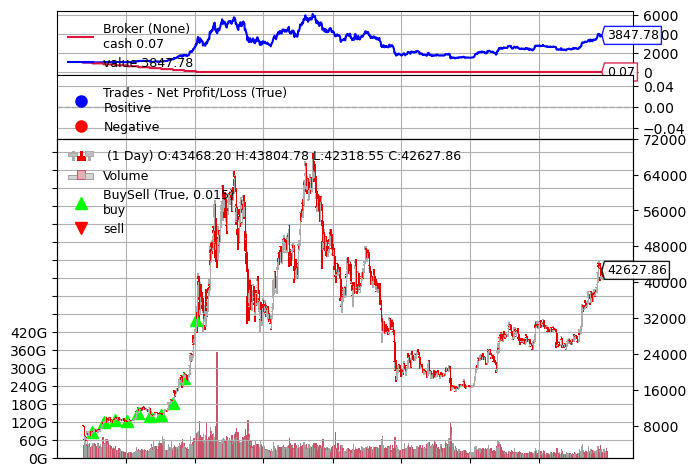

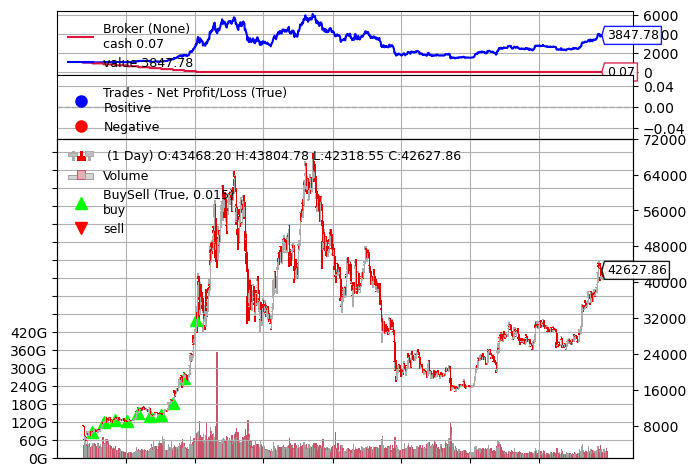

: 

In [22]:
import yfinance as yf
import matplotlib
import backtrader as bt
import datetime
import random
import matplotlib.pyplot as plt
%matplotlib inline
class DCAStrategy(bt.Strategy):
    params = (
        ("monthly_investment", 100),  # Dollar amount to invest monthly
        ("crypto_symbol", "BTC-USD"),  # Cryptocurrency symbol
        ("buy_day", random.randint(1,28) ),  # Day of the month to make the purchase
    )

    def __init__(self):
        self.cashflow_date = None
        # keep track of the amount of BTC owned
        self.btc_owned = 0

    def next(self):
        dt = self.data.datetime.datetime()
        if dt.month != self.cashflow_date:
            if dt.day == self.params.buy_day:
                self.buy_crypto()



    def buy_crypto(self):
        close_price = self.data.close[0]
        size = self.params.monthly_investment / close_price
        print(f"Buying {size} units of {self.params.crypto_symbol} at {close_price}")
        self.buy(size=size)
        self.cashflow_date = self.data.datetime.date(0).month
        self.btc_owned += size
        print(f"Total BTC owned: {self.btc_owned}")








cerebro = bt.Cerebro()
filename = 'btcusd.csv'
datapath = os.getcwd() + '/' + filename



def download_yahoo_data(symbol, start_date, end_date):
    data = yf.download(symbol, start=start_date, end=end_date)
    return data

start_date = datetime.datetime(2020, 3, 10)
end_date = datetime.datetime(2023, 12, 29)


data = bt.feeds.PandasData(dataname=download_yahoo_data("BTC-USD", start_date, end_date))



# Function to calculate the months between two dates, the first date will be the start date and the second date will be the end date of the investment period
# The dates will be in the format from datetime.datetime(2021, 1, 1) to datetime.datetime(2023, 12, 29)
def months_between_dates(start_date, end_date):
    months = (end_date.year - start_date.year) * 12 + (end_date.month - start_date.month)
    return months

print(months_between_dates(start_date, end_date))

cerebro.adddata(data)
cerebro.addstrategy(DCAStrategy)

initial_cash = 1000

# Set our desired cash start
cerebro.broker.setcash(initial_cash)


# # Set the commission
# cerebro.broker.setcommission(commission=0.0)
# Print out the starting conditions
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
# Run over everything
cerebro.run()
# Print out the final result
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

# Print the total net profit at the end of the backtest
# It would be the final portfolio value minus the starting cash and the amount invested over the period which is from 2021-01-01 to 2023-12-29
net_profit = cerebro.broker.getvalue() - (initial_cash + (100 * months_between_dates(start_date, end_date)))

print(f"Net Profit: ${net_profit}")
print(cerebro.broker.getvalue())
# Plot the result
cerebro.plot(style='candlestick', iplot=False)[0][0].figure

# fig = cerebro.plot(style='candlestick', iplot=False)[0][0].figure
# ax = fig.axes[0]

# Show the plot
# fig.show()